<a href="https://colab.research.google.com/github/Syasa1/DAP/blob/main/%5BLab_session_4%5D_Data_Visualizations_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

### Line-plot
Draw a line-plot for the age-specific height averages for men and women

- Men are represented in blue and women in red
- Use x_label() and y_label(), title(), and legend() to draw
- Use xticks() to separate the intervals on the x-axis graph
  - Separate into 10 units from 20 to 60.

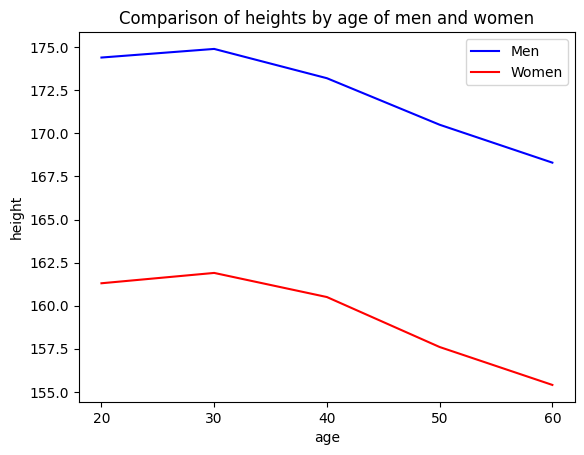

In [ ]:
# Male Data
x = [20,30,40,50,60]
y = [174.4, 174.9, 173.2, 170.5, 168.3]

plt.plot(x,y,label='Men',color='blue')

# Female Data
x = [20,30,40,50,60]
y = [161.3, 161.9, 160.5, 157.6, 155.4]

plt.plot(x,y, label='Women',color='red')

# Sepsarate x
plt.xticks([20,30,40,50,60])

# Draw
plt.xlabel("age")
plt.ylabel("height")
plt.title("Comparison of heights by age of men and women")
plt.legend()

plt.show()

###Histogram Plot with Barplot
Draw the horsepower mean by type

- df_sample should contain only `Type` and `Horsepower` properties
- Drop the `NAN` value

Returns all the number of times for each value in the `Type`


In [ ]:
df['Type'].value_counts()

Midsize    22
Small      20
Compact    16
Sporty     12
Large      11
Van         9
Name: Type, dtype: int64

Use barh() to draw the histogram by `Type`


Text(0, 0.5, 'Type')

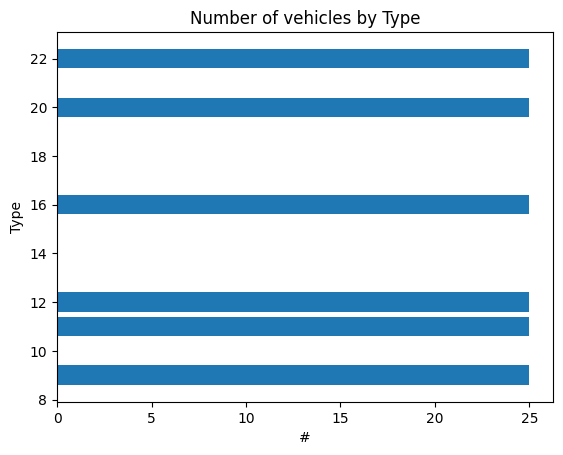

In [ ]:
# Draw plot
plt.barh(df['Type'].value_counts(),width=25)
plt.title('Number of vehicles by Type')
plt.xlabel('#')
plt.ylabel('Type')

### Pie Plot

Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method and the [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*).
Please give the `startangle` option to 30

- Use `autopct` to represent decimal places

ValueError: ignored

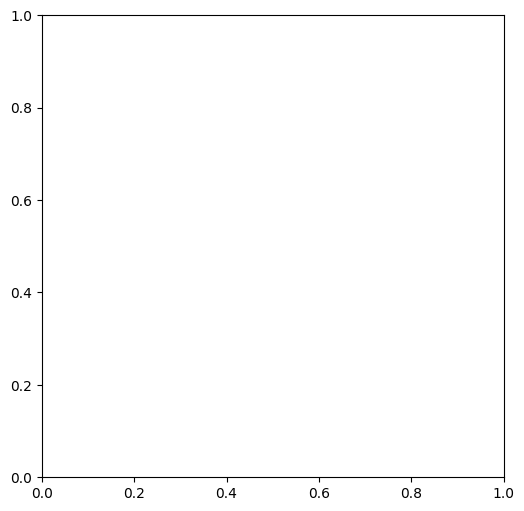

In [ ]:
typeCount = df['Type'].value_counts(normalize=True)
# typeCount
fig, ax = plt.subplots(figsize=(6,6))

# Draw!!
ax.pie(
      typeCount,
      labels=df.Type,
      colors=['r', 'b','o','p','g','br'],
      startangle=30,
      shadow=True,
      explode=(0,0.1,0,0),
      autopct='%1,1f%%')


plt.show()

## Seaborn
Please refer the [official doc](https://seaborn.pydata.org/).

### Boxplot
Plot *boxplot* which comparing the `Price` according to `Manufacturer`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Blues` color palette


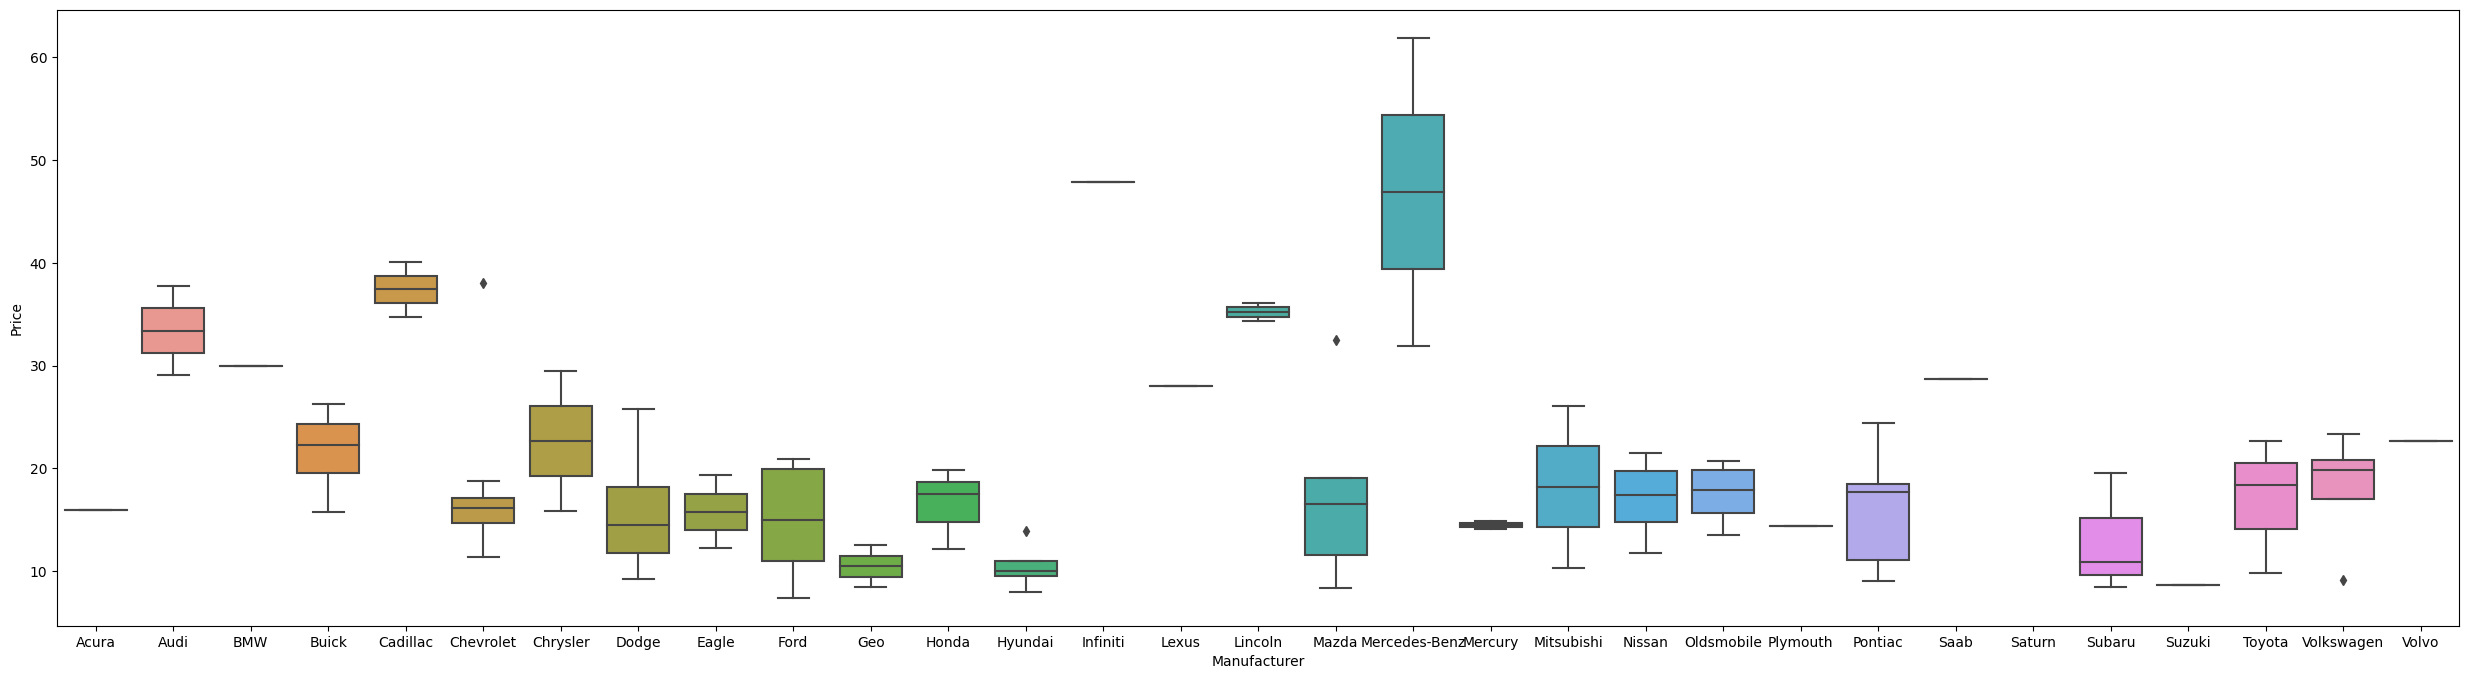

In [ ]:
fig, ax = plt.subplots(figsize=(31,8))
sns.boxplot(x=df.Manufacturer, y=df.Price,data=df.Origin)
plt.show()

### Heatmap and Pairplot
This part brought the correlation problem that was dealt with in the previous practice problem. Please refer `lecture3.ipynb`

- Select `Price`,`Horsepower`, `Passengers`, `Length`, `Weight`
- Put this in the `df`
- Use the `pearson` method to obtain the correlation value


In [ ]:
targetVar = df
selectedDataFrame = df[['Price','Horsepower','Passengers','Length','Weight']]
corr =selectedDataFrame.corr(method='pearson')
corr

,Price,Horsepower,Passengers,Length,Weight
Price,1.000000,0.794607,0.040890,0.564704,0.642563
Horsepower,0.794607,1.000000,-0.039870,0.552906,0.777764
Passengers,0.040890,-0.039870,1.000000,0.473748,0.577401
Length,0.564704,0.552906,0.473748,1.000000,0.813305
Weight,0.642563,0.777764,0.577401,0.813305,1.000000


Make *heatmap*!
- Set annot to `True`and Make it the `4th` decimal place
- Set the color to `bone_r`
- refer ([sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html))

In [ ]:
ax = sns.heatmap(tagetVarCorr, annot=True,fmt='.4f',cmap="bone_r")

NameError: ignored

Plot *pair plot*. The plot must satisify following conditions.

- Create a pair plot using the `targetvar` value above
- Put the corr value in the pair plot in `text format`!

KeyboardInterrupt: ignored

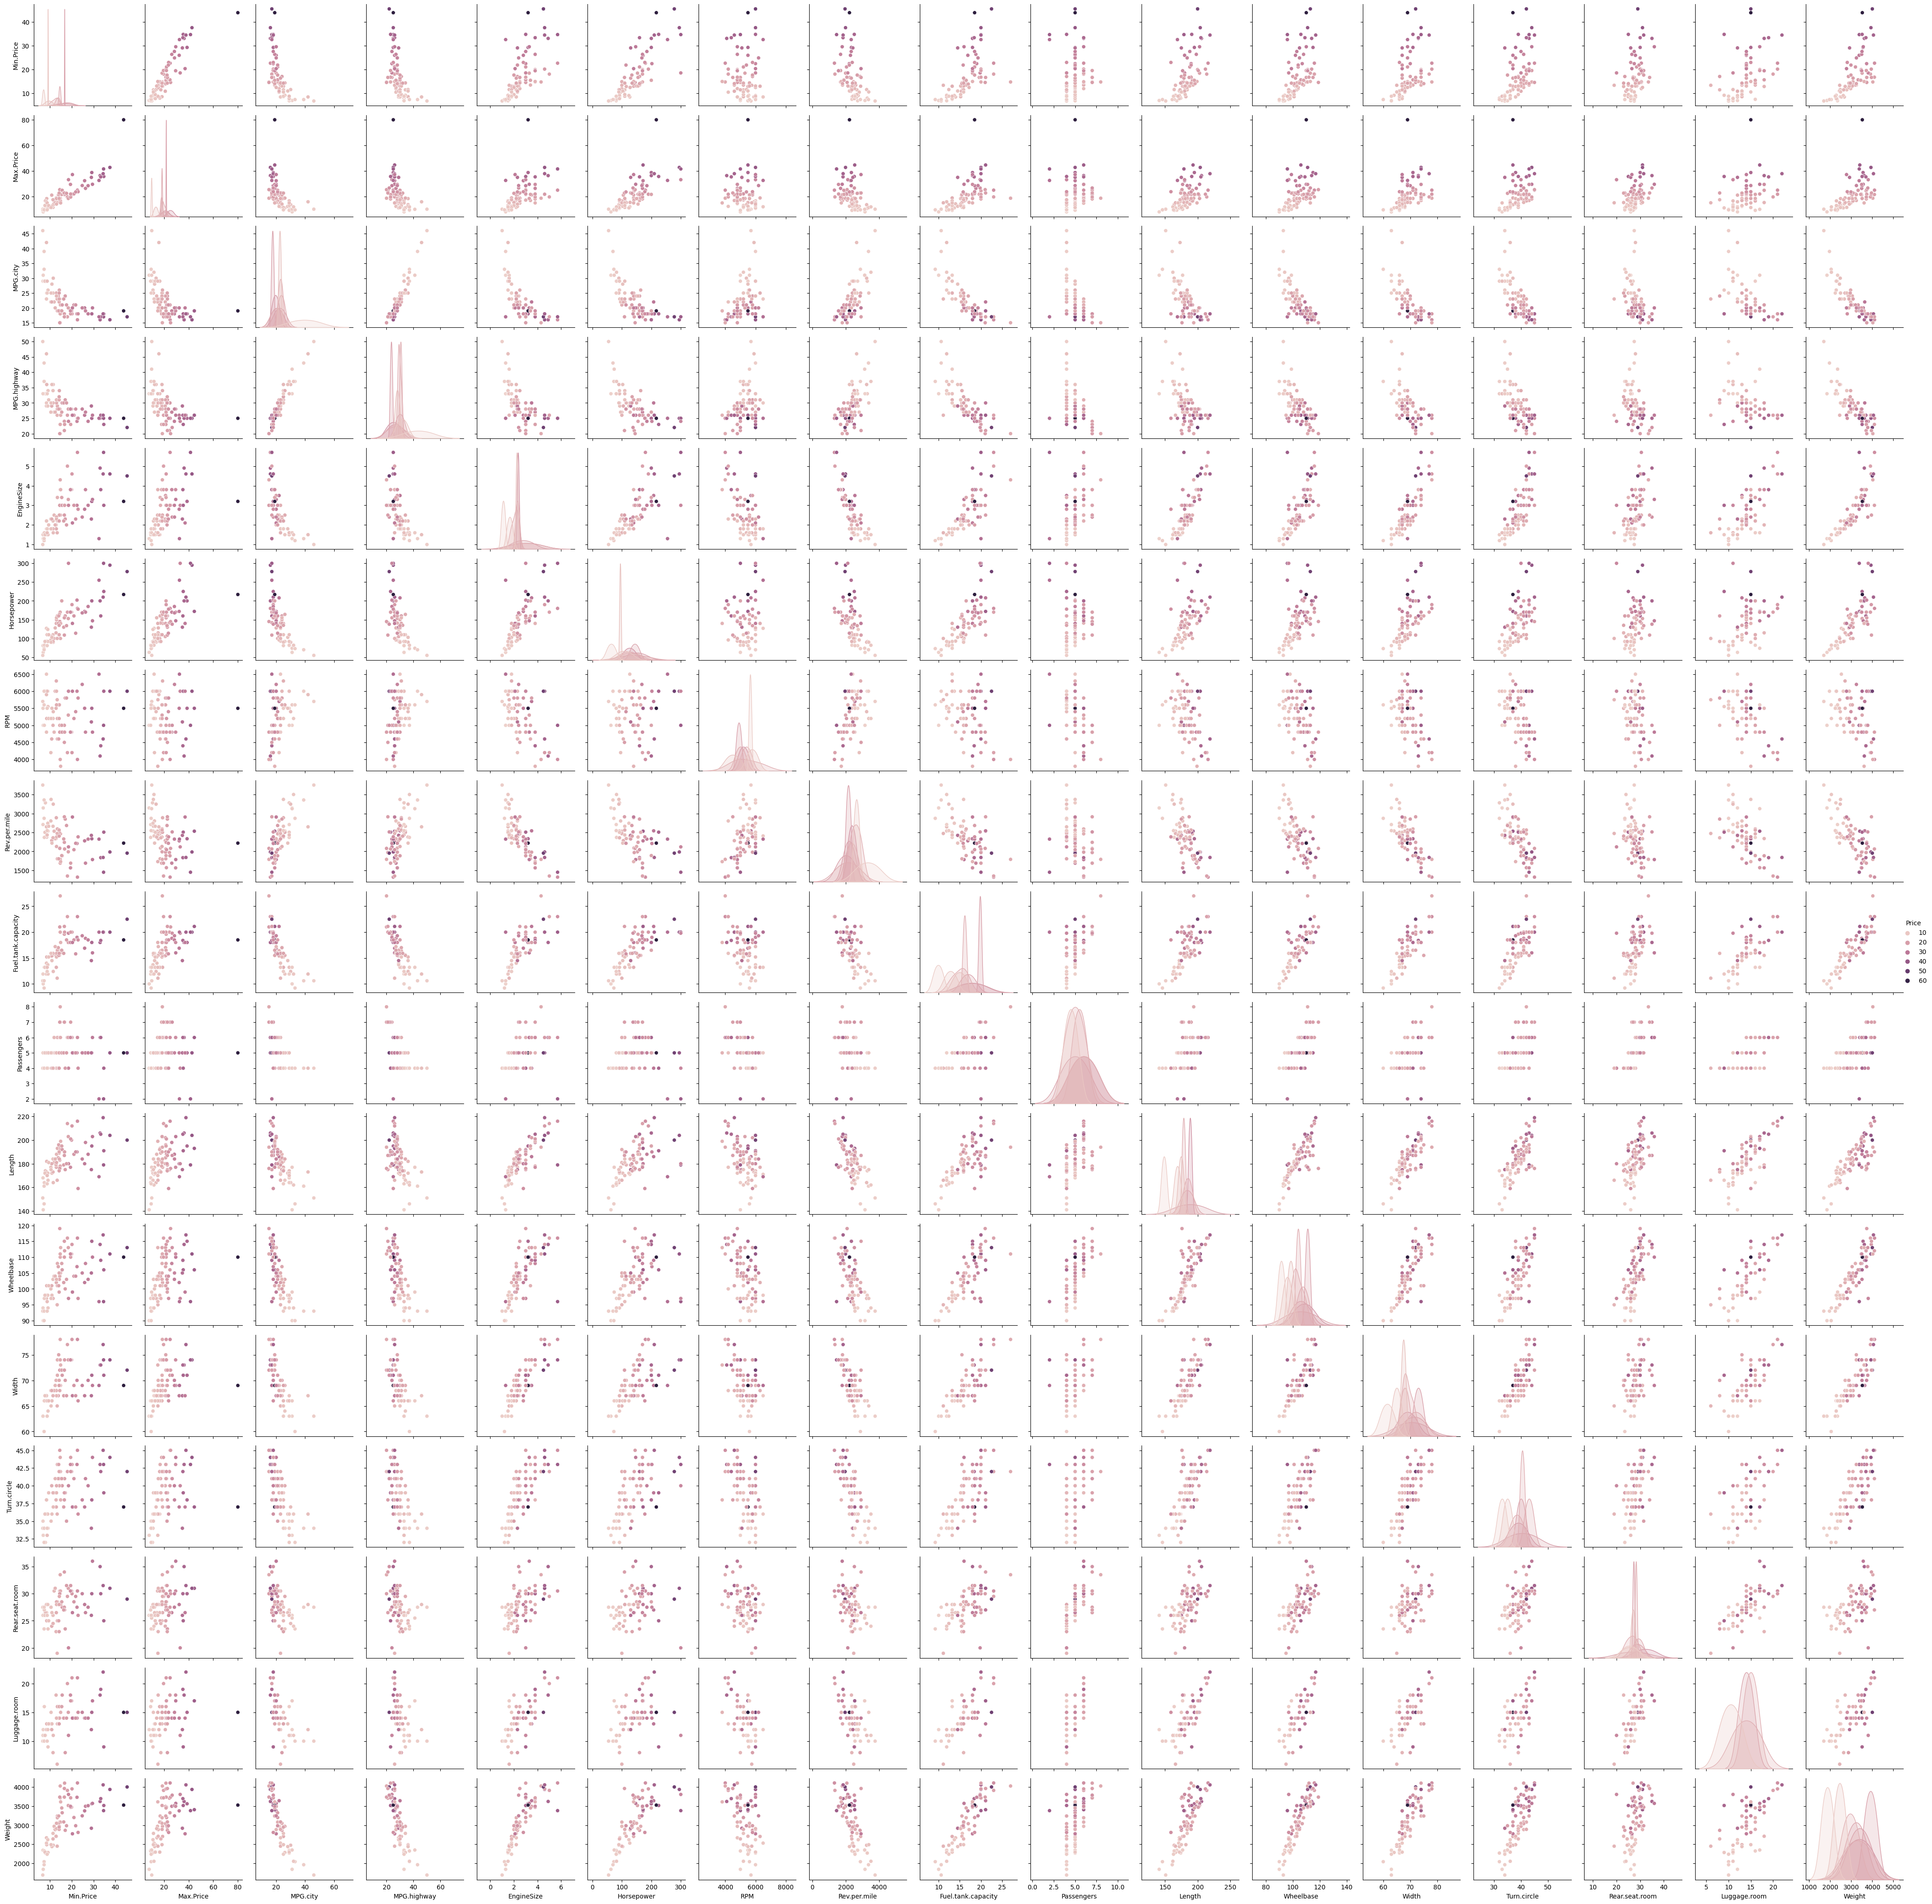

In [201]:
g = sns.pairplot(targetVar, hue='Price')

corrValue = corr.to_numpy()
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):
    ax.text(0.4, 0.8, f"Corr: {cv:.4f}", fontsize=9,
            horizontalalignment="left", verticalalignment="top",
            transform=ax.transAxes)

plt.show()

## Plotly

### Density contour plot
Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable among `MPG.city`, `MPG.highway`, `Rev.per.mile`.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [202]:
# install packages
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0


In [ ]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output


# Load Dash App
app = dash.Dash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown',
                                               options=[{'label' : 'city','value' : 'MPG.city'},
                                                        {'label' : 'highway','value' : 'MPG.highway'},
                                                        {'label' : 'per.mile','value' : 'Rev.per.mile'},],
                                               value = 'MPG.city'),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = px.density_contour(df,x="Price",y=dropdown_value,
                             marginal_x="histogram",
                             marginal_y="histogram")

    return fig

if __name__ == '__main__':
    app.run_server(host='localhost', port=1050)

Dash app running on:


/usr/local/lib/python3.10/dist-packages/dash/dash.py:525: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>